# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining Functions
Compute Cost & Cost Function,
Gradient Descent Function with default alpha ( Learning Rate ) & iterations ( epochs ),
Predict and Accuracy Function
And Sigmoid Activation Function.


In [2]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost.item()

In [3]:
def gradient_descent(x, yA, yB, yC, alpha=0.001, iterations=1000):
    m, n = x.shape
    weights = np.zeros((n, 3))
    costs = []

    for i in range(iterations):
        activations = sigmoid(x @ weights)
        cost = (cost_function(weights[:, 0], x, yA) + 
                cost_function(weights[:, 1], x, yB) + 
                cost_function(weights[:, 2], x, yC)) / 3
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
            print(f"Activations (first 5):\n {activations[:5]}")
            print(f"Weights (first 5):\n {weights[:5]}")
        costs.append(cost)
        gradients = (x.T @ (activations - np.column_stack((yA, yB, yC)))) / m
        weights -= alpha * gradients
    return weights, costs

In [4]:
def predict(x, ths):
    q = np.dot(x, ths)
    h = sigmoid(q)
    return np.argmax(h, axis=1)

def accuracy(pred, target):
    index_to_label = {0: 'A', 1: 'B', 2: 'C'}
    pred_labels = [index_to_label[p] for p in pred]
    correct_predictions = sum(1 for p, t in zip(pred_labels, target) if p == t)
    acc = (correct_predictions / len(target)) * 100
    return acc

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Reading The dataset using __Pandas__

In [6]:
data = pd.read_csv('LogisticRegressionDataset.csv')
df = pd.DataFrame(data)
df.head()

,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'm __dropping the NaN__ ( Not a Number datas ) from my data set.

In [7]:
for i in range(14, 32):
    if f'Unnamed: {i}' in df.columns:
        df.drop([f'Unnamed: {i}'], axis=1, inplace=True)

__I'm Selecting inputs and output ( datas and labels from my DataFrame )__


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

__Converting labels to one-hot encoding__

In [9]:
yA = (y == 'A').astype(int)
yB = (y == 'B').astype(int)
yC = (y == 'C').astype(int)

# Bias
Adding Bias Terms to Inputs (X)

In [10]:
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [11]:
X

array([[1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.000e+00, 1.437e+01, 1.950e+00, ..., 8.600e-01, 3.450e+00,
        1.480e+03],
       ...,
       [1.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Shuffling Out data

In [12]:
data_len = len(df)
per_list = np.random.permutation(data_len)
X = X[per_list]
y = y[per_list]
yA = yA[per_list]
yB = yB[per_list]
yC = yC[per_list]

# Train Test Split Manual Setup
70% Training size , 30% Test size

In [13]:
trn_test_split = int(0.70 * len(X))

X_train = X[:trn_test_split]

Y_trainA = yA[:trn_test_split]
Y_trainB = yB[:trn_test_split]
Y_trainC = yC[:trn_test_split]

X_val = X[trn_test_split:]

Y_valA = yA[trn_test_split:]
Y_valB = yB[trn_test_split:]
Y_valC = yC[trn_test_split:]

# Data Normalization
I Wrote epsilon to avoide devision by zero.

In [14]:
m = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

epsilon = 1e-8

X_train_normalized = (X_train - m) / (sigma + epsilon)
X_val_normalized = (X_val - m) / (sigma + epsilon)

Adding a __bias__ column to the __normalized features__

In [15]:
X_train_normalized = np.hstack([np.ones((X_train_normalized.shape[0], 1)), X_train_normalized])
X_val_normalized = np.hstack([np.ones((X_val_normalized.shape[0], 1)), X_val_normalized])

In [16]:
X_val_normalized

array([[ 1.00000000e+00,  0.00000000e+00, -1.11864466e-01,
         4.16290805e-01,  1.18481861e+00,  4.07384264e-01,
        -2.10857415e-01, -1.27926595e+00, -1.63620703e+00,
         1.25462878e+00, -1.59900464e+00, -1.97137935e-01,
        -8.01556137e-01, -4.46770893e-01, -4.77564427e-01],
       [ 1.00000000e+00,  0.00000000e+00, -1.49152622e+00,
        -7.90835346e-01, -1.55031777e+00,  3.48363929e-01,
        -9.45573053e-01, -5.85748237e-01, -5.28482179e-01,
        -5.46154992e-01, -1.47921542e-01, -1.32822597e+00,
        -1.52711182e-02,  1.01481649e+00, -8.18983999e-01],
       [ 1.00000000e+00,  0.00000000e+00, -8.45198190e-01,
         9.19882566e-02,  2.60265469e-01,  4.07384264e-01,
        -6.39142872e-02,  3.28434201e-01, -1.49006594e-02,
        -2.32975207e-01, -5.57201390e-01, -9.65424145e-01,
        -6.70508634e-01,  1.08646293e+00, -1.00432605e+00],
       [ 1.00000000e+00,  0.00000000e+00,  5.96610487e-01,
        -4.84549606e-01,  8.38111184e-01,  1.12282589

# Printing Initial Data states

In [17]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_trainA:", Y_trainA.shape)
print("First 5 rows of X_train:\n", X_train[:5])
print("First 5 rows of Y_trainA:\n", Y_trainA[:5])
print("Initial Weights:\n", np.zeros((X_train_normalized.shape[1], 3)))

Shape of X_train: (123, 14)
Shape of Y_trainA: (123,)
First 5 rows of X_train:
 [[1.000e+00 1.181e+01 2.120e+00 2.740e+00 2.150e+01 1.340e+02 1.600e+00
  9.900e-01 1.400e-01 1.560e+00 2.500e+00 9.500e-01 2.260e+00 6.250e+02]
 [1.000e+00 1.339e+01 1.770e+00 2.620e+00 1.610e+01 9.300e+01 2.850e+00
  2.940e+00 3.400e-01 1.450e+00 4.800e+00 9.200e-01 3.220e+00 1.195e+03]
 [1.000e+00 1.103e+01 1.510e+00 2.200e+00 2.150e+01 8.500e+01 2.460e+00
  2.170e+00 5.200e-01 2.010e+00 1.900e+00 1.710e+00 2.870e+00 4.070e+02]
 [1.000e+00 1.196e+01 1.090e+00 2.300e+00 2.100e+01 1.010e+02 3.380e+00
  2.140e+00 1.300e-01 1.650e+00 3.210e+00 9.900e-01 3.130e+00 8.860e+02]
 [1.000e+00 1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00
  3.100e+00 1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]]
First 5 rows of Y_trainA:
 [0 1 0 0 0]
Initial Weights:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 

# Fitting 

In [19]:
weights, costs = gradient_descent(X_train_normalized, Y_trainA, Y_trainB, Y_trainC, alpha=0.01, iterations=1000)

Iteration 0, Cost: 0.6931471805599454
Activations (first 5):
 [[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]
Weights (first 5):
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Iteration 100, Cost: 0.389857113757091
Activations (first 5):
 [[0.35136023 0.56578755 0.47460313]
 [0.7331524  0.35786467 0.29687488]
 [0.26683454 0.87946801 0.19128812]
 [0.56009489 0.6310771  0.22670867]
 [0.52637982 0.70533091 0.19333046]]
Weights (first 5):
 [[-0.13352464 -0.08305444 -0.22646182]
 [ 0.          0.          0.        ]
 [ 0.22095643 -0.2675133   0.04962886]
 [-0.03855817 -0.08387791  0.12360033]
 [ 0.07875721 -0.09953156  0.02144231]]
Iteration 200, Cost: 0.2888353940766781
Activations (first 5):
 [[0.26402298 0.60609129 0.44148228]
 [0.82106256 0.27148321 0.21420556]
 [0.14846414 0.96254906 0.083305  ]
 [0.54385287 0.70534718 0.13325967]
 [0.48276982 0.80730648 0.10038768]]
Weights (first 5):
 [[-0.24023351 -0.14985084 -0.40492465]
 [ 0.          0.

# Printing the Final Weights

In [20]:
print("Final Weights:\n", weights)

Final Weights:
 [[-0.70258426 -0.465122   -1.17536401]
 [ 0.          0.          0.        ]
 [ 0.82174155 -0.97934218  0.24383894]
 [ 0.097243   -0.34361101  0.3036381 ]
 [ 0.35585592 -0.43228805  0.09977393]
 [-0.71824907  0.44333027  0.16844797]
 [ 0.19071325 -0.24686923  0.04915746]
 [ 0.27827467  0.03658493 -0.30812001]
 [ 0.47349162  0.13893607 -0.60155223]
 [-0.19689616  0.11906776  0.04889855]
 [-0.03371914  0.16401468 -0.16060843]
 [ 0.13967362 -0.88665313  0.82529252]
 [ 0.12527013  0.55127569 -0.70241527]
 [ 0.44857159  0.19141805 -0.6470667 ]
 [ 1.04023981 -0.94993817 -0.02927843]]


__Validate Predictions__

In [21]:
pred_val = predict(X_val_normalized, weights)
print("Predictions (first 10):", pred_val[:10])
print("True Labels (first 10):", y[trn_test_split:][:10])

Predictions (first 10): [2 1 1 0 1 0 2 1 1 0]
True Labels (first 10): ['C' 'B' 'B' 'A' 'B' 'A' 'C' 'B' 'B' 'A']


In [22]:
acc_val = accuracy(pred_val, y[trn_test_split:])
print(f'Accuracy on validation set: {acc_val:.2f}%')

Accuracy on validation set: 100.00%


# Plotting The Cost Function

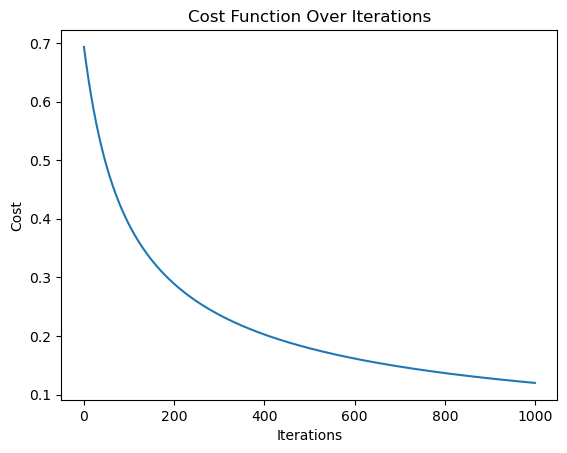

In [23]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()